## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

### Exercise 1

The aim of lesson five is to implement a Metropolis algorithm code to sample the probability density $|\Psi(\vec{r},t)|^2$ of a non-relativistic spinless electron of hydrogen atom in the ground state ( $\Psi_{1,0,0}(r,\theta,\phi)$ ) and in $2p$ excited state ( $\Psi_{2,1,0}(r,\theta,\phi)$ ) in cartesian coordinate.

Below are reported pictures of estimations of  $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties (calculated with blocking method) in Bohr radius units, as a function of the number of blocks.
Results are obtained using an uniform transition probability $T(\vec{x}|\vec{y})$ with a step chosen in order to obtain 50% of acceptance.

For this simulation I chose to use $100$ steps of equilibration (this should be a safe choice, see below), $100$ blocks of $50$ steps and a starting point of $(1,1,1)$, that results in a distance from the origin close to equilibrium value.

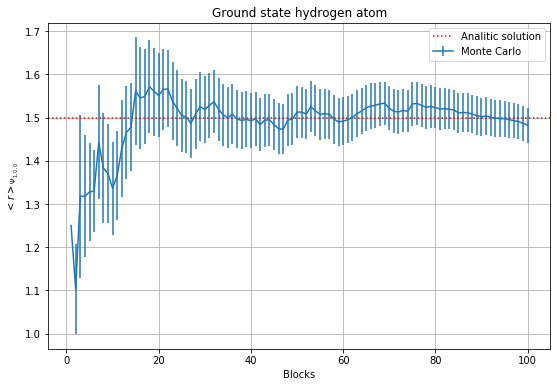

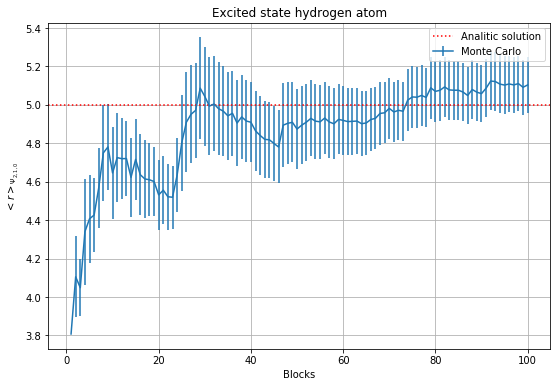

In [2]:
plt.figure(1, figsize = (9, 6))
x_1s, y_1s, yerr_1s = np.loadtxt("Exercise_01/data/avg_1s_position.dat", delimiter = "   ", unpack = True)
plt.title("Ground state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_1s, y_1s, yerr_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))
x_2p, y_2p, yerr_2p = np.loadtxt("Exercise_01/data/avg_2p_position.dat", delimiter = "   ", unpack = True)
plt.title("Excited state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_2p, y_2p, yerr_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

Results obtained seem to be compatible with expectations value of $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$.

- What do you observe when you start very far from the origin?

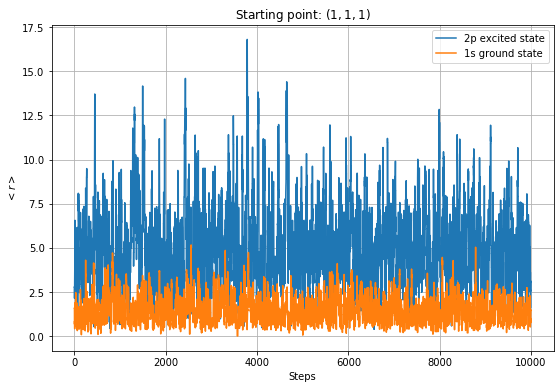

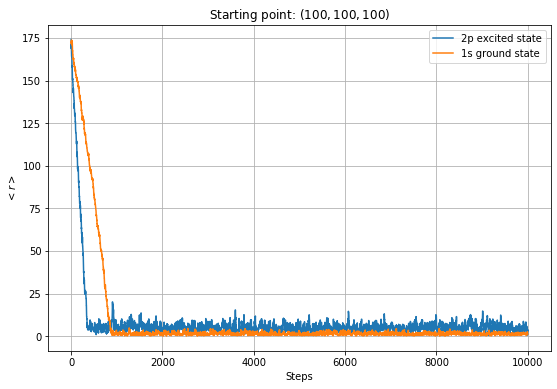

In [3]:
plt.figure(1, figsize = (9, 6))

close_pos_1s = np.loadtxt("Exercise_01/data/output_close_1s_position.dat")
close_pos_2p = np.loadtxt("Exercise_01/data/output_close_2p_position.dat")

plt.title("Starting point: $(1,1,1)$")
plt.xlabel('Steps')
plt.ylabel('$< r >$')
plt.plot(close_pos_2p, label="2p excited state")
plt.plot(close_pos_1s, label="1s ground state")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))

far_pos_1s = np.loadtxt("Exercise_01/data/output_far_1s_position.dat")
far_pos_2p = np.loadtxt("Exercise_01/data/output_far_2p_position.dat")

plt.title("Starting point: $(100,100,100)$")
plt.xlabel('Steps')
plt.ylabel('$< r >$')
plt.plot(far_pos_2p, label="2p excited state")
plt.plot(far_pos_1s, label="1s ground state")
plt.grid(True)
plt.legend()

Starting far from the origin results in having longer equilibration time.
In the example above we can observe that in the case of starting point $(1,1,1)$ (the case of the previous simulation) we don't observe a visible out-of-equilibrium transient and $100$ steps of equilibration are surely enough.
In the case of starting point $(100,100,100)$ we need at least $900$ equilibration steps for the ground state and $350$ equilibration steps for the excited state.

- How large should be the number of Monte Carlo Metropolis steps in each block?

[7.38736221]
[9.22456806]


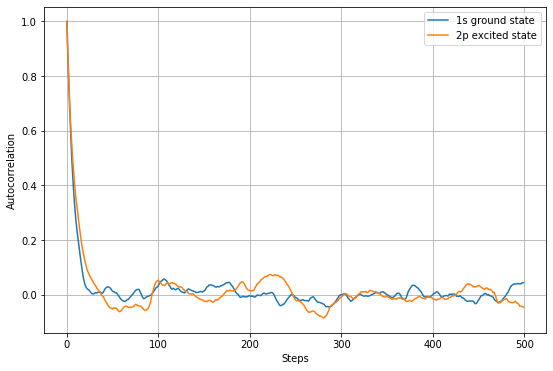

In [4]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

pos1s = np.loadtxt("Exercise_01/data/output_close_1s_position.dat")
pos2p = np.loadtxt("Exercise_01/data/output_close_2p_position.dat")

corr1s = [autocorrelation(pos1s, t) for t in range(500)]
corr2p = [autocorrelation(pos2p, t) for t in range(500)]

plt.figure(1, figsize = (9, 6))

corr_lenght_1s, var_1s = optimize.curve_fit(exp_fit, np.arange(500), corr1s)
corr_lenght_2p, var_2p = optimize.curve_fit(exp_fit, np.arange(500), corr2p)

plt.plot(corr1s, label="1s ground state")
plt.plot(corr2p, label="2p excited state")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.legend()

print(corr_lenght_1s)
print(corr_lenght_2p)

Using previously obtained data I calculated the autocorrelation functions of $\left\langle r \right\rangle$ and fitted it with an exponential function to obtain the Monte Carlo correlation time to estimate the minimum size of the blocks to use for my simulation.
Results are of the order of ten and show that my previous choice of $50$ steps-per-block should be a safe choice.

- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

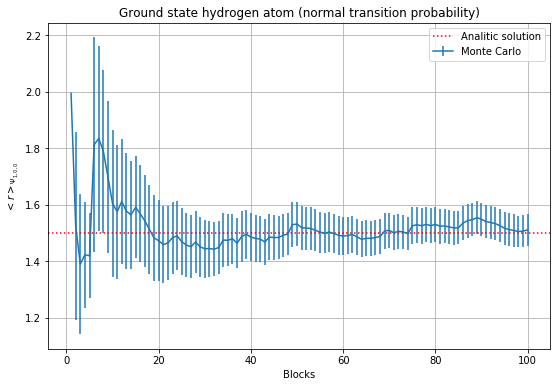

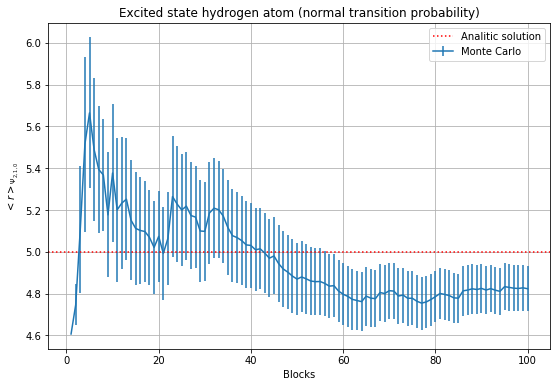

In [5]:
plt.figure(1, figsize = (9, 6))
x_norm_1s, y_norm_1s, yerr_norm_1s = np.loadtxt("Exercise_01/data/avg_1s_gauss_position.dat", delimiter = "   ", unpack = True)
plt.title("Ground state hydrogen atom (normal transition probability)")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_norm_1s, y_norm_1s, yerr_norm_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))
x_norm_2p, y_norm_2p, yerr_norm_2p = np.loadtxt("Exercise_01/data/avg_2p_gauss_position.dat", delimiter = "   ", unpack = True)
plt.title("Excited state hydrogen atom (normal transition probability)")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(x_norm_2p, y_norm_2p, yerr_norm_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

For this simulation I chose the same parameters used with the uniform sampling.
Result don't show remarkable differences between them.
Analitic value lies within two standard deviations from obtained value, for the Gaussian sampling.

I finally used the provided Python code to observe how the sampled points are distributed in the space.

Text(0.5, 0.92, 'Excited state hydrogen atom')

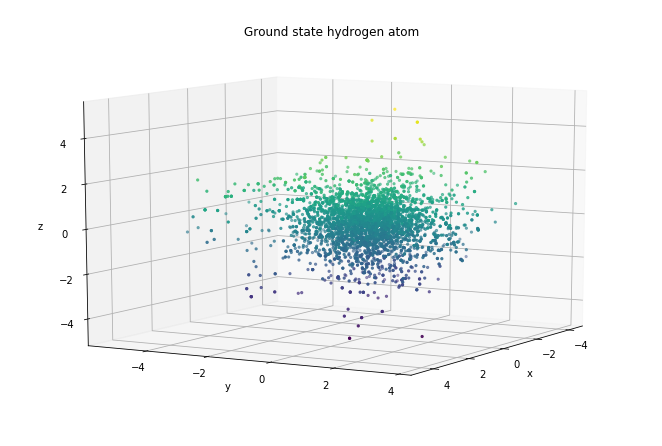

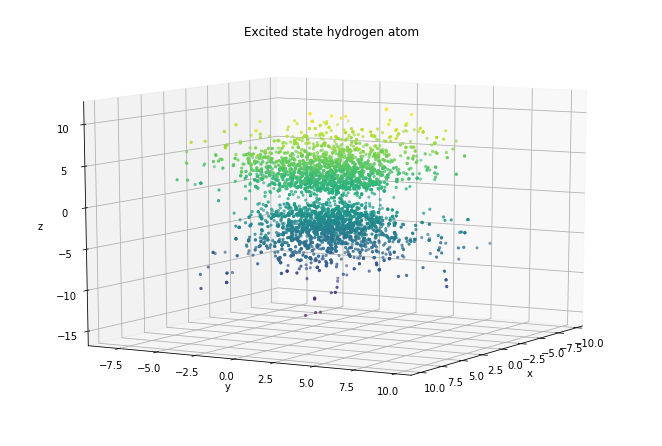

In [7]:
X_1s, Y_1s, Z_1s = np.loadtxt("Exercise_01/data/sampled_1s_points.dat", delimiter = "   ", unpack = True)
X_2p, Y_2p, Z_2p = np.loadtxt("Exercise_01/data/sampled_2p_points.dat", delimiter = "   ", unpack = True)

fig = plt.figure(1, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_1s, Y_1s, Z_1s, c=Z_1s, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Ground state hydrogen atom")

fig = plt.figure(2, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_2p, Y_2p, Z_2p, c=Z_2p, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Excited state hydrogen atom")